<a href="https://colab.research.google.com/github/KJOELJOYSON2427/NLP_SENTIMENTAL_ANALYSIS/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q yfinance

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [40]:
# Import libraries
import pandas as pd
import yfinance as yf
from datetime import datetime

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Define time period: last 1 year
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download each stock's data using yfinance
company_data = {}  # store data in a dictionary instead of using globals()

for stock in tech_list:
    company_data[stock] = yf.download(stock, start=start, end=end)


#Add company name column to each DataFrame

company_names ={
    'AAPL': 'APPLE',
    'GOOG': 'GOOGLE',
    'MSFT': 'MICROSOFT',
    'AMZN': 'AMAZON'
}

for ticker, name in company_names.items():
   company_data[ticker]['company_name'] = name


# Combine all company DataFrames into one
df = pd.concat(company_data.values(), axis=0)

# Display the last 10 rows



/tmp/ipython-input-3034499612.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3034499612.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3034499612.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3034499612.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  company_data[stock] = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [30]:
df.head(10)

Price,Close,High,Low,Open,Volume,company_name,Close,High,Low,Open,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,GOOG,GOOG,GOOG,GOOG,...,MSFT,MSFT,MSFT,MSFT,MSFT,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-08,226.157166,227.851149,225.609108,226.366414,38328800.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-11,223.436813,224.901615,220.716475,224.204094,42005600.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-12,223.436813,224.792003,222.569896,223.755689,40398300.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-13,224.323654,225.848241,221.972002,223.217580,48566200.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-14,227.412720,228.060414,224.204109,224.224042,44923900.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-15,224.204102,226.117308,223.476688,225.599143,47923700.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-18,227.213425,228.927342,224.373500,224.453219,44633700.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-11-19,227.472473,229.345828,225.858209,226.177069,36211800.0,APPLE,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
company_data.values()

dict_values([Price            Close        High         Low        Open    Volume  \
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
Date                                                                   
2024-11-08  226.157166  227.851149  225.609108  226.366414  38328800   
2024-11-11  223.436813  224.901615  220.716475  224.204094  42005600   
2024-11-12  223.436813  224.792003  222.569896  223.755689  40398300   
2024-11-13  224.323654  225.848241  221.972002  223.217580  48566200   
2024-11-14  227.412720  228.060414  224.204109  224.224042  44923900   
...                ...         ...         ...         ...       ...   
2025-11-03  269.049988  270.850006  266.250000  270.420013  50194600   
2025-11-04  270.040009  271.489990  267.619995  268.329987  49274800   
2025-11-05  270.140015  271.700012  266.929993  268.609985  43683100   
2025-11-06  269.769989  273.399994  267.890015  267.890015  51204000   
2025-11-07  268.470001  272.290009  266.779999  269

In [32]:
company_data['AAPL'].describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,226.966039,229.306743,224.348793,226.659709,5.446323e+07
std,20.989261,20.601814,21.157680,20.990043,2.327577e+07
min,171.998978,189.875218,168.796824,171.530131,2.323470e+07
25%,209.774426,211.763712,207.578697,209.734468,4.051272e+07
50%,227.462517,230.238468,225.689556,227.253269,4.751995e+07
75%,242.172810,244.531444,240.472579,242.103044,5.723262e+07
max,271.399994,277.320007,269.160004,276.989990,1.843959e+08


In [33]:
company_data['GOOG'].head()

Price,Close,High,Low,Open,Volume,company_name
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,
2024-11-08,179.076233,181.555388,178.787503,181.206907,15021500,GOOGLE
2024-11-11,181.177032,181.291537,179.205665,179.285318,12503400,GOOGLE
2024-11-12,182.521164,183.223078,180.201315,180.589615,14065800,GOOGLE
2024-11-13,179.703506,181.819247,179.335108,181.356261,13969700,GOOGLE
2024-11-14,176.577194,179.658709,175.262939,178.966730,17925800,GOOGLE


In [34]:
company_data['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-11-08 to 2025-11-07
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Close, AAPL)     250 non-null    float64
 1   (High, AAPL)      250 non-null    float64
 2   (Low, AAPL)       250 non-null    float64
 3   (Open, AAPL)      250 non-null    float64
 4   (Volume, AAPL)    250 non-null    int64  
 5   (company_name, )  250 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 13.7+ KB


In [35]:
company_data['AAPL'].isnull().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0
company_name,,0


In [74]:
company_list= [company_data[ticker] for ticker in tech_list]
company_list

[Price            Close        High         Low        Open    Volume  \
 Ticker            AAPL        AAPL        AAPL        AAPL      AAPL   
 Date                                                                   
 2024-11-08  226.157166  227.851149  225.609108  226.366414  38328800   
 2024-11-11  223.436813  224.901615  220.716475  224.204094  42005600   
 2024-11-12  223.436813  224.792003  222.569896  223.755689  40398300   
 2024-11-13  224.323654  225.848241  221.972002  223.217580  48566200   
 2024-11-14  227.412720  228.060414  224.204109  224.224042  44923900   
 ...                ...         ...         ...         ...       ...   
 2025-11-03  269.049988  270.850006  266.250000  270.420013  50194600   
 2025-11-04  270.040009  271.489990  267.619995  268.329987  49274800   
 2025-11-05  270.140015  271.700012  266.929993  268.609985  43683100   
 2025-11-06  269.769989  273.399994  267.890015  267.890015  51204000   
 2025-11-07  268.470001  272.290009  266.779999  26

In [56]:
plt.figure(figsize=(15, 10
                    ))
plt.subplots_adjust(top=1.25, bottom=1.2)

<Figure size 1500x1000 with 0 Axes>

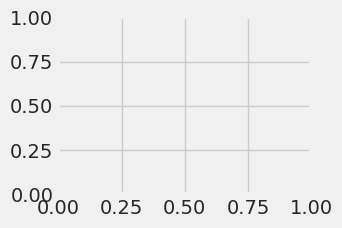

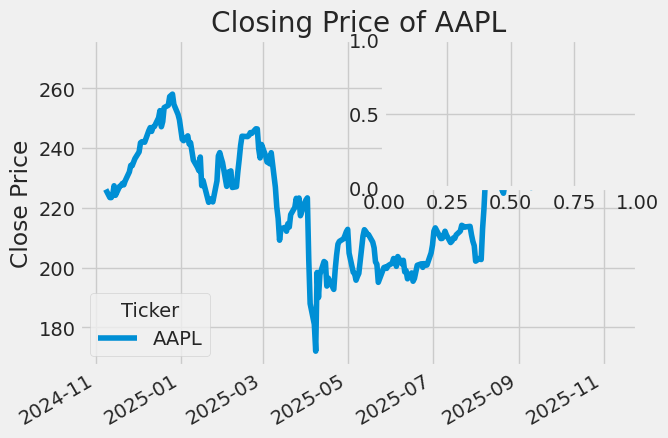

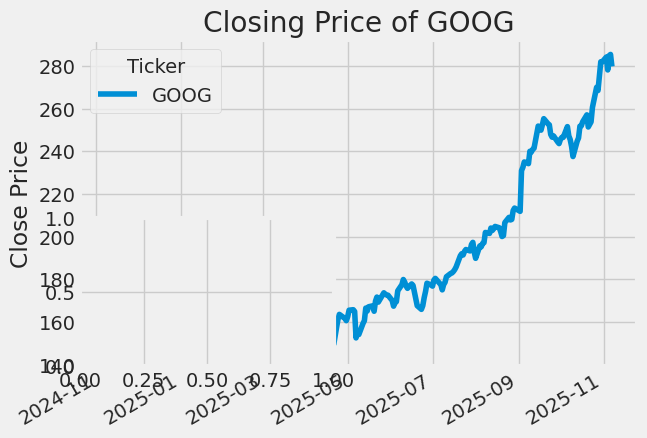

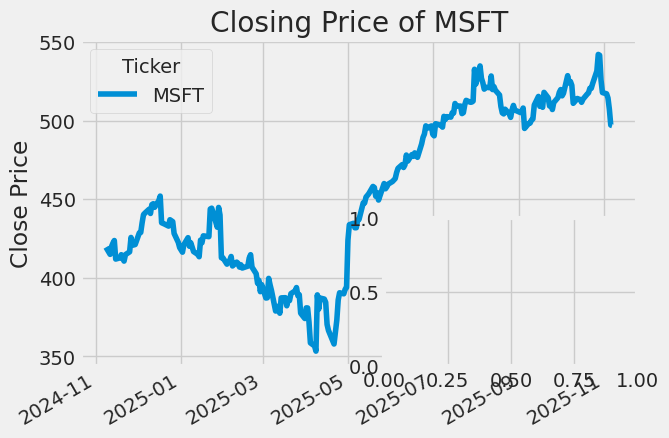

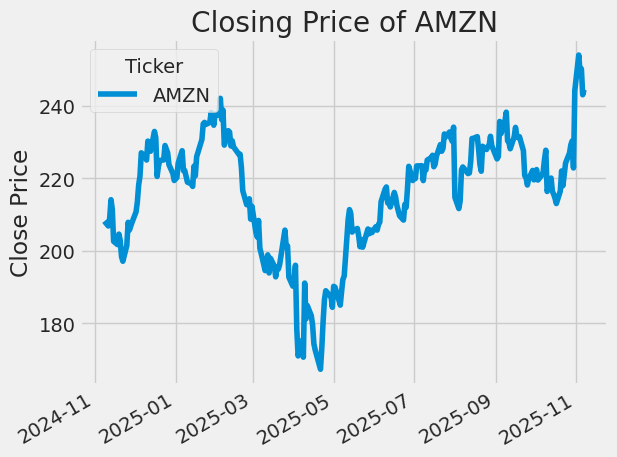

In [58]:

for i, (ticker, company) in enumerate(zip(tech_list, company_list),1):
  plt.subplot(2, 2, i)
  company['Close'].plot()  # ✅ changed from 'Adj Close' to 'Close'
  plt.ylabel('Close Price')
  plt.xlabel(None)
  plt.title(f"Closing Price of {ticker}")
plt.tight_layout()
plt.show()

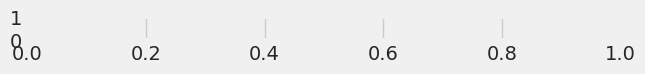

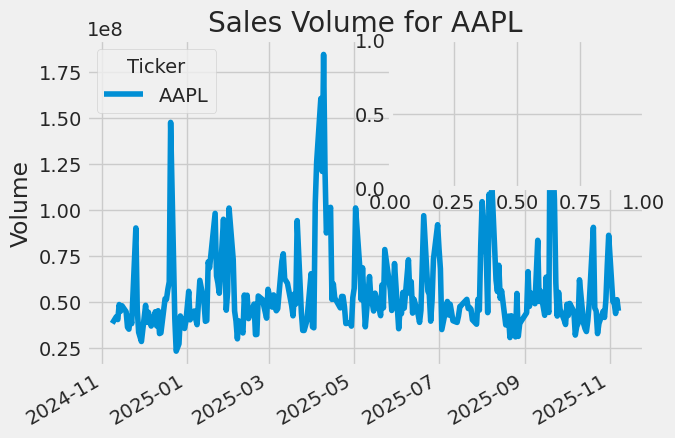

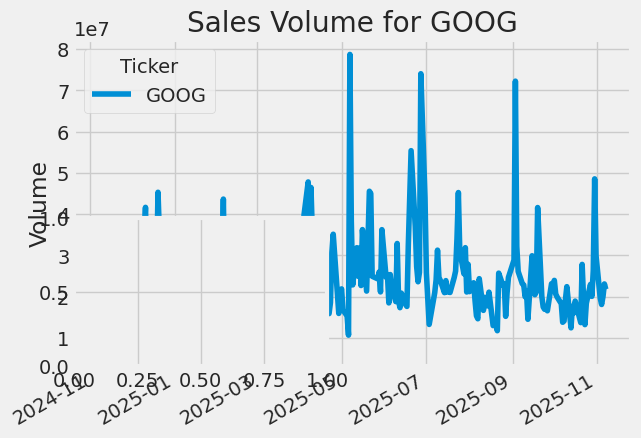

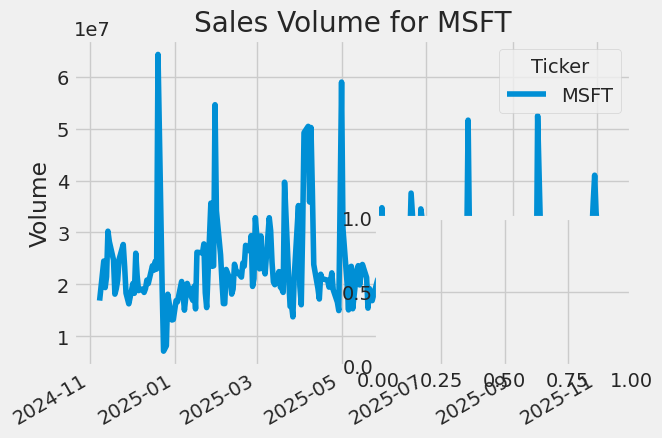

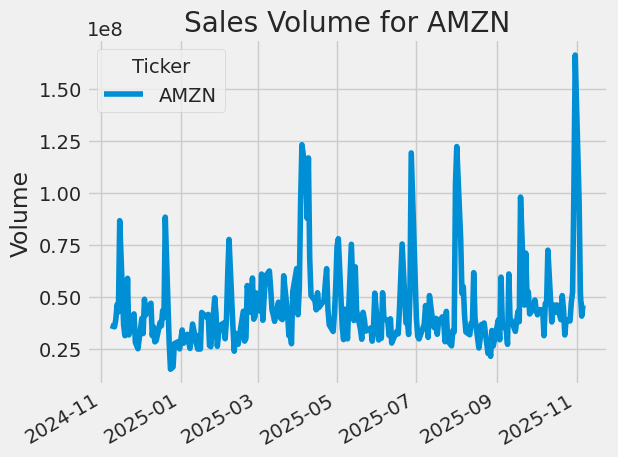

In [59]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (ticker, company) in enumerate(zip(tech_list, company_list),1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()  # ✅ changed from 'Adj Close' to 'Close'
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {ticker}")
plt.tight_layout()
plt.show()

# What was the moving average of the various stocks?

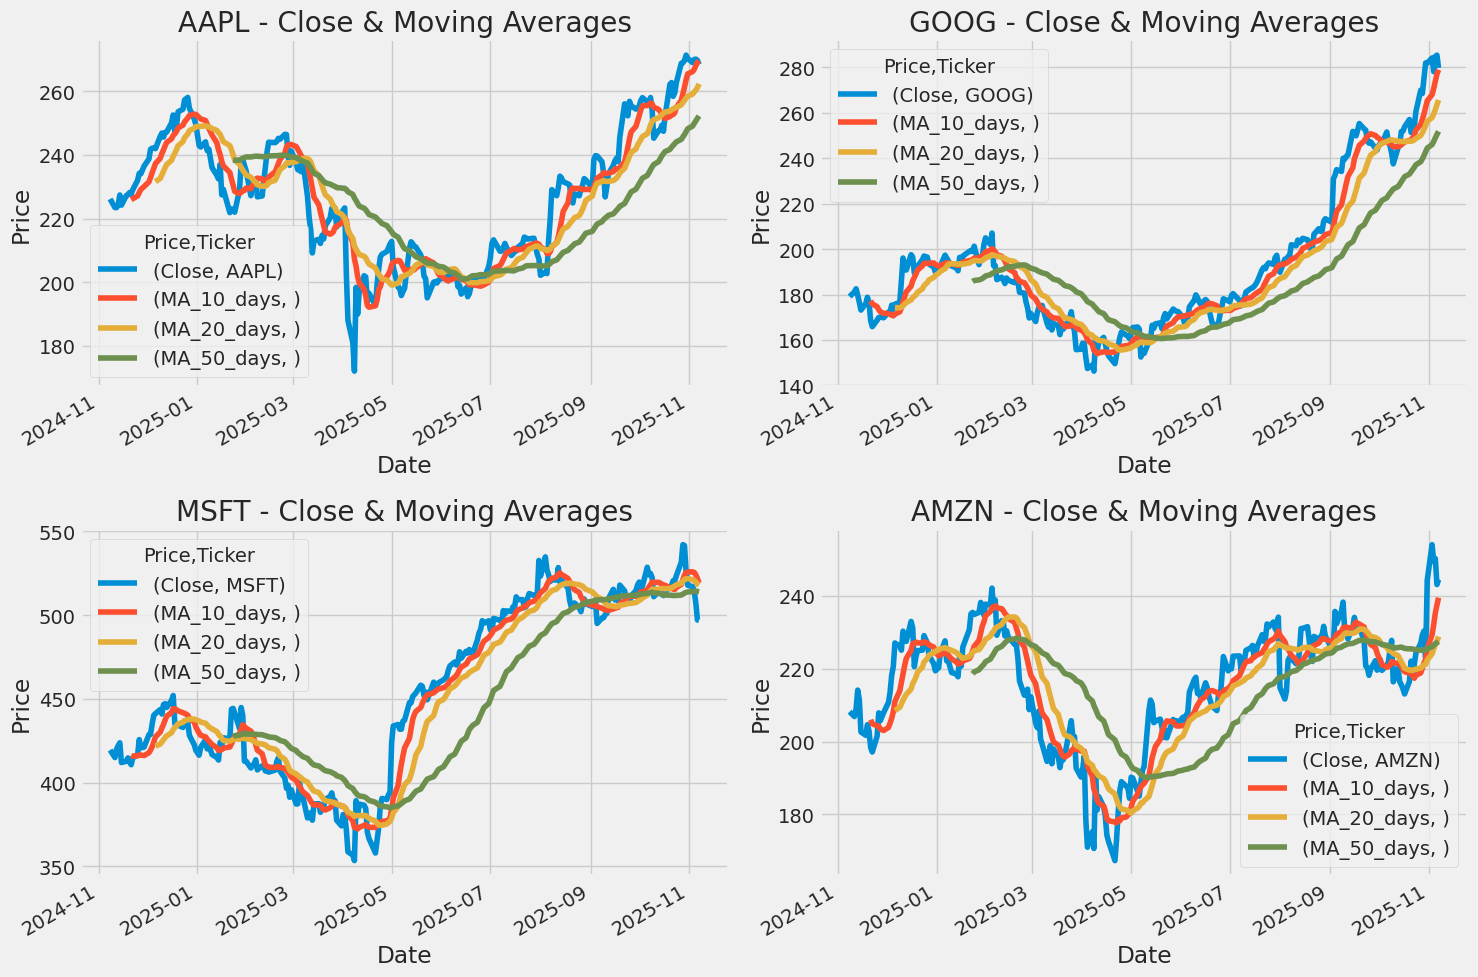

In [73]:
import matplotlib.pyplot as plt

# Calculate Moving Averages (MA)
ma_days = [10, 20, 50]
for ma in ma_days:
    for ticker in tech_list:
        column_name = f"MA_{ma}_days"
        company_data[ticker][column_name] = company_data[ticker]['Close'].rolling(window=ma).mean()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot each company with its moving averages
for ax, ticker in zip(axes.flat, tech_list):
    company_data[ticker][['Close', 'MA_10_days', 'MA_20_days', 'MA_50_days']].plot(ax=ax)
    ax.set_title(f"{ticker} - Close & Moving Averages")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

plt.tight_layout()
plt.show()


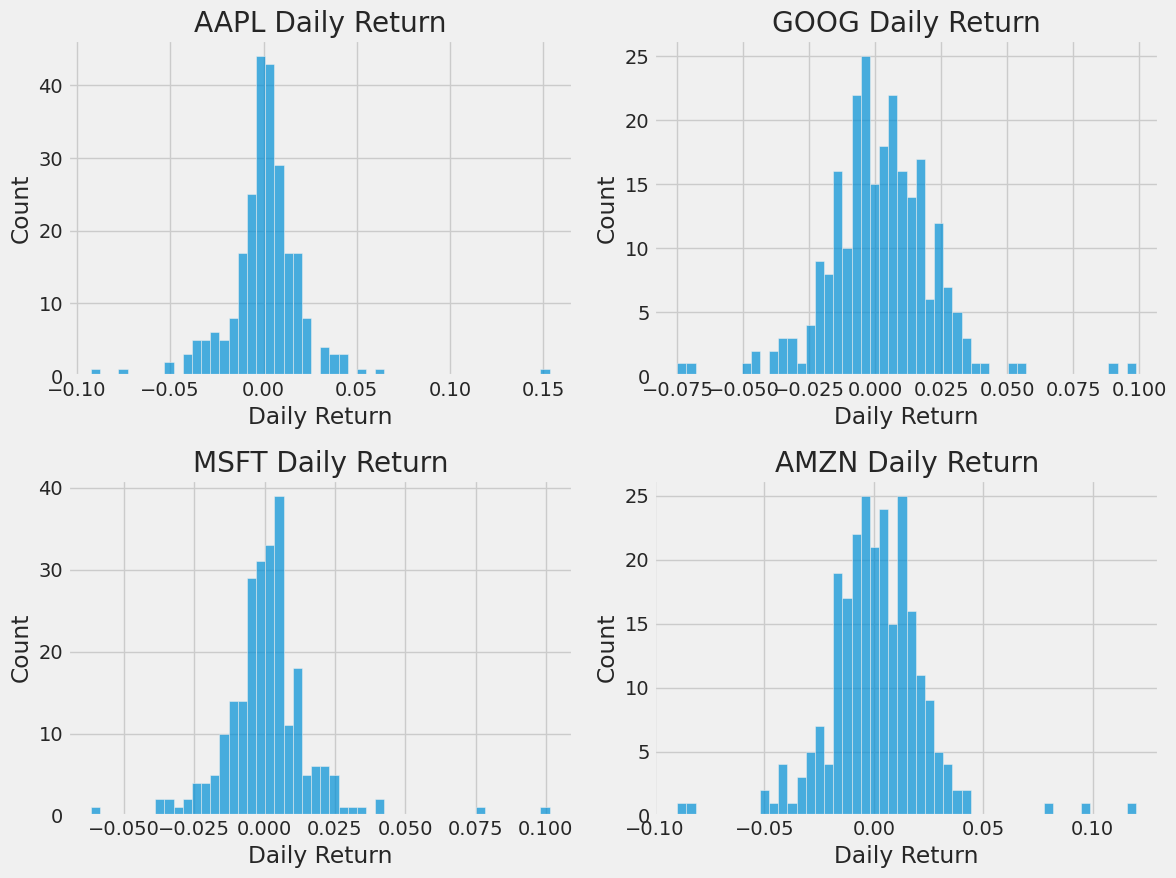

In [75]:
import matplotlib.pyplot as plt

# Calculate Daily Return for each company
for ticker in tech_list:
    company_data[ticker]['Daily Return'] = company_data[ticker]['Close'].pct_change()

# Plot histograms of Daily Returns
plt.figure(figsize=(12, 9))

for i, ticker in enumerate(tech_list, 1):
    plt.subplot(2, 2, i)
    company_data[ticker]['Daily Return'].hist(bins=50, alpha=0.7)
    plt.xlabel('Daily Return')
    plt.ylabel('Count')
    plt.title(f'{ticker} Daily Return')

plt.tight_layout()
plt.show()
